<a href="https://colab.research.google.com/github/Tejesh-25/Machine_Learning_Prediction/blob/Machine_Learning/CarDekho_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Statement**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import pickle

In [ ]:
df=pd.read_excel("/content/CAR DETAILS FROM CAR DEKHO.xlsx")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
df['name']=df['name'].str.split(" ").str[0]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


**Data Visualization**

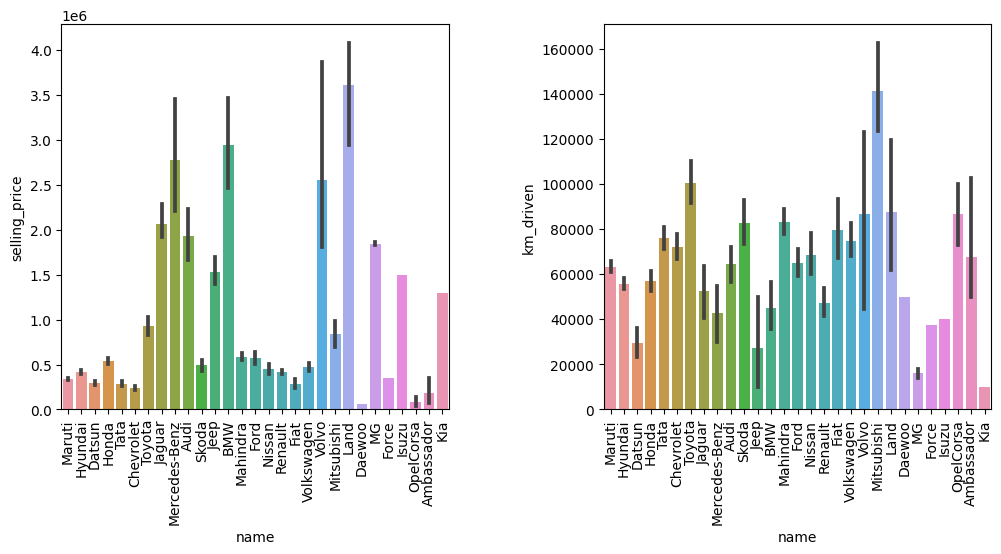

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(data=df,x='name',y='selling_price')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(data=df,x='name',y='km_driven')
plt.xticks(rotation=90)
plt.subplots_adjust(wspace=0.4)
plt.show()

With the above two barplots we can clearly see that if kilometer driven is increase the price of the car would be decrease. for instance we can take the car of Mitsubishi and we see that the kilometer driven for Mitsubishi is nearly average of 1,40,000 kilometers.With the given dataset that kilometer is quite high and the selling price for that particular car price is nearly average 1000000.

**The conclusion is if the kilometer driven is increased the price of the car will decrease.**

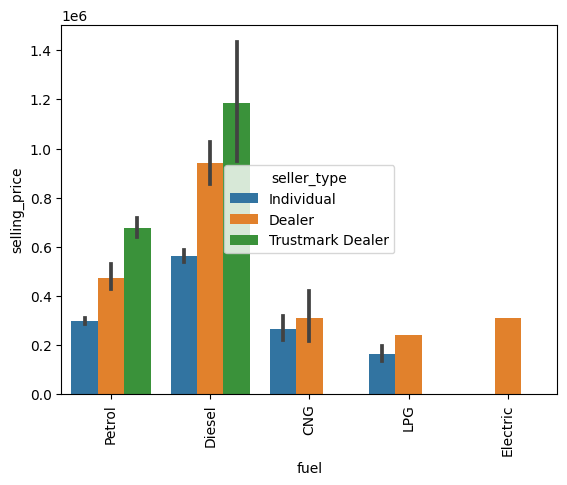

In [ ]:
sns.barplot(data=df,x='fuel',y='selling_price',hue='seller_type')
plt.xticks(rotation=90)
plt.show()

With the help of the above barplot we can clearly see that the "Trustmark Dealer" having the higher selling_price in the market compare to dealer and individual but at the same time the "Trustmark Dealer" are mainly focus on the Petrol and Diesel comapre to CNG,LPG and Electrical.

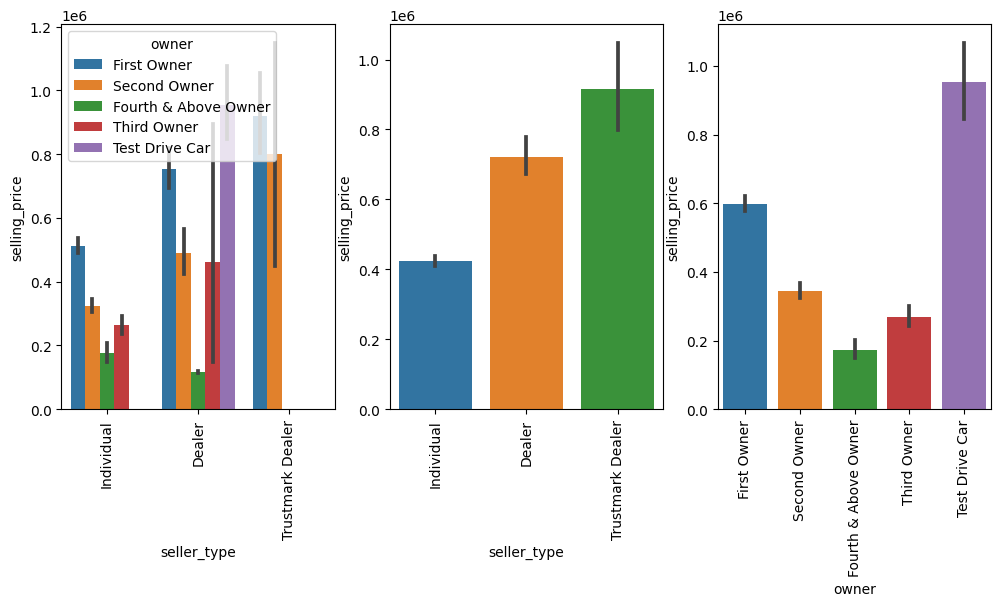

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.barplot(data=df,x="seller_type",y='selling_price',hue='owner')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.barplot(data=df,x="seller_type",y="selling_price")
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.barplot(data=df,x="owner",y="selling_price")
plt.xticks(rotation=90)
plt.show()


With the above two barplot we can say that **"Trustmark dealer"** having higher selling_price because they are mainly focusing on only **First owner and Second owner**.The second highest selling_price is for **"Dealer"** beacuse they dealing with all the owners as well as Test Drive Car. The last weigtage to the **"Individual"** because they dealing with only owners and they are not capable to sell the Test Drive Cars.

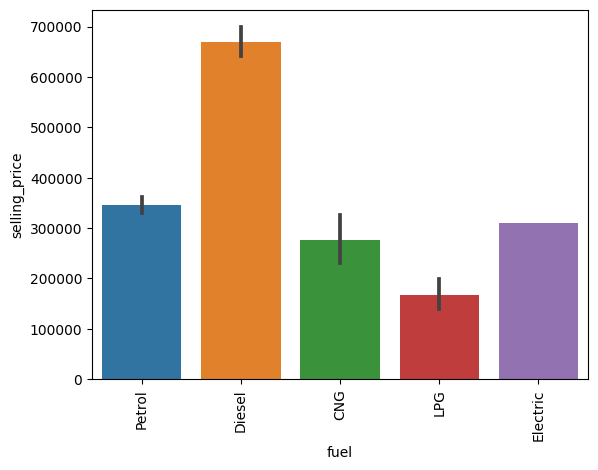

In [ ]:
sns.barplot(data=df,x='fuel',y='selling_price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
new_df=df[['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

In [ ]:
new_df['current_year']=2023

In [ ]:
new_df['no_year']=new_df['current_year']-new_df['year']

In [ ]:
new_df.drop(['current_year','year'],axis=1,inplace=True)

In [ ]:
new_df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,Maruti,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda,450000,141000,Diesel,Individual,Manual,Second Owner,9


**Encoding**

In [ ]:
mapping_owner={"First Owner":4,"Test Drive Car":5,"Second Owner":3,"Third Owner":2,"Fourth & Above Owner":1}
new_df['owner']=new_df['owner'].map(mapping_owner)

In [ ]:
mapping_transmission={"Manual":2,"Automatic":1}
new_df['transmission']=new_df['transmission'].map(mapping_transmission)

In [ ]:
mapping_fuel={"Petrol":4,"Diesel":5,"CNG":2,"Electric":3,"LPG":1}
new_df['fuel']=new_df['fuel'].map(mapping_fuel)

In [ ]:
mapping_sellerType={"Individual":1,"Dealer":2,"Trustmark Dealer":3}
new_df['seller_type']=new_df['seller_type'].map(mapping_sellerType)

In [ ]:
dummies=pd.get_dummies(new_df['name'],drop_first=True)
dummies.head()

,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,Hyundai,...,Mercedes-Benz,Mitsubishi,Nissan,OpelCorsa,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_df=pd.concat([new_df,dummies],axis=1)

In [ ]:
final_df.drop('name',axis=1,inplace=True)

In [ ]:
X=final_df.drop("selling_price",axis=1)
y=final_df['selling_price']

**Linear Regression**

In [ ]:
model=LinearRegression()
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0)
model.fit(X_train,y_train)
yhat=model.predict(X_eval)
error_ms=mean_squared_error(y_eval,yhat)
print("mean_squared_error:",error_ms)
error_ma=mean_absolute_error(y_eval,yhat)
print("mean_absolute_error:",error_ma)
r2_lr=r2_score(y_eval,yhat)
print("r2_score:",r2_lr)

mean_squared_error: 108531365967.66248
mean_absolute_error: 196457.01004332083
r2_score: 0.7077392905449467


**K Nearest Neighbor regressor**

In [ ]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
yhat_knn=model.predict(X_eval)
error_knn=mean_squared_error(yhat_knn,y_eval)
print("Mean_Squared_Error:",error_knn)
mbs_error_knn=mean_absolute_error(yhat_knn,y_eval)
print("Mean_Absolute_Error:",mbs_error_knn)
r2_knn=r2_score(yhat_knn,y_eval)
print("r2_score:",r2_knn)

Mean_Squared_Error: 108531365967.66248
Mean_Absolute_Error: 196457.01004332083
r2_score: 0.579106144541272


**Decision Tree Regressor**

In [ ]:
dtr=DecisionTreeRegressor()
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0)
dtr.fit(X_train,y_train)
yhat_dtr=dtr.predict(X_eval)
error_dtr_ms=mean_squared_error(y_eval,yhat_dtr)
print("mean_squared_error:",error_dtr_ms)
error_dtr_ma=mean_absolute_error(y_eval,yhat_dtr)
print("mean_absolute_error:",error_dtr_ma)
r2_dtr=r2_score(y_eval,yhat_dtr)
print("r2_score:",r2_dtr)


mean_squared_error: 209554727392.22543
mean_absolute_error: 153176.77134079437
r2_score: 0.4356966509058746


**Random Forest Regressor**

In [ ]:
rfr=RandomForestRegressor()
X_train,X_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2,random_state=0)
rfr.fit(X_train,y_train)
yhat_rfr=rfr.predict(X_eval)
error_rfr_ms=mean_squared_error(y_eval,yhat_rfr)
print("mean_squared_error:",error_rfr_ms)
error_rfr_ma=mean_absolute_error(y_eval,yhat_rfr)
print("mean_absolute_error:",error_rfr_ma)
r2_rfr=r2_score(y_eval,yhat_rfr)
print("r2_score:",r2_rfr)

mean_squared_error: 73693222194.9006
mean_absolute_error: 127972.11400025914
r2_score: 0.8015538346110211


In [ ]:
with open("RandomForest_CarPricePrediction","wb") as f:
  pickle.dump(rfr,f)
with open("RandomForest_CarPricePrediction","rb") as f:
  rfr_car_price_prediction=pickle.load(f)

**Conclusion:**

**R^2 Score (Coefficient of Determination):**

The R^2 score is a measure of how well the model explains the variability in the target variable. It ranges from 0 to 1, where 1 indicates a perfect fit.
An R^2 score of **0.80155** suggests that about **80.15%** of the variance in the target variable is explained by the RandomForestRegressor model. This is generally considered a good fit, as a higher R^2 score indicates a better-explained variance.

**Mean Absolute Error (MAE):**

MAE represents the average absolute difference between the predicted and actual values. It is a measure of the model's accuracy, and lower values are better.
A Mean Absolute Error of **127972** indicates, on average, the model's predictions are off by approximately **127972** **rupees** from the actual values.
